In [1]:
import pandas as pd # Python Data Analysis Library
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

from IPython.display import Image

pd.options.mode.chained_assignment = None # remove annoying warnings

In [2]:
# The following data was assembled by myself using data from:
# http://www.the-numbers.com/movie/budgets/all

movie_data_csv = pd.read_csv('./data/movies_data.csv')
movie_data_csv

,year,title,genre,prod_budget,domestic_gross
0,2015,50 Shades of Grey,Drama,40000000,NaN
1,2013,The Hunger Games: Catching Fire,Adventure,130000000,424668047.0
2,2012,The Avengers,Adventure,225000000,623279552.0
3,2011,Harry Potter and the Deathly Hallows: Part II,Adventure,125000000,381011232.0
4,2009,Avatar,Action,425000000,760507648.0
5,2008,The Dark Knight,Action,185000000,533345358.0
6,2005,Star Wars Ep. III: Revenge of the Sith,Adventure,115000000,380270592.0
7,2003,Finding Nemo,Adventure,94000000,380529376.0
8,2002,Spider-Man,Adventure,139000000,403706375.0
9,1999,Star Wars Ep. I: The Phantom Menace,Adventure,115000000,474544677.0


In [3]:
movie_data_csv.describe()

,year,prod_budget,domestic_gross
count,16.00000,1.600000e+01,1.500000e+01
mean,1999.87500,1.141125e+08,4.209166e+08
std,11.76931,1.027385e+08,1.350326e+08
min,1980.00000,1.500000e+07,2.481600e+08
25%,1992.25000,3.812500e+07,3.447378e+08
50%,2002.50000,1.045000e+08,3.957083e+08
75%,2009.50000,1.322500e+08,4.496064e+08
max,2015.00000,4.250000e+08,7.605076e+08


In [4]:
movie_data = movie_data_csv.dropna()

In [5]:
pbm = movie_data.loc[:, ("prod_budget")] / 1000000.
movie_data.loc[:, ("prod_budget_millions")] = pbm
dgm = movie_data.loc[:, ("domestic_gross")] / 1000000.
movie_data.loc[:, ("domestic_gross_millions")] = dgm
movie_data

,year,title,genre,prod_budget,domestic_gross,prod_budget_millions,domestic_gross_millions
1,2013,The Hunger Games: Catching Fire,Adventure,130000000,424668047.0,130.0,424.668047
2,2012,The Avengers,Adventure,225000000,623279552.0,225.0,623.279552
3,2011,Harry Potter and the Deathly Hallows: Part II,Adventure,125000000,381011232.0,125.0,381.011232
4,2009,Avatar,Action,425000000,760507648.0,425.0,760.507648
5,2008,The Dark Knight,Action,185000000,533345358.0,185.0,533.345358
6,2005,Star Wars Ep. III: Revenge of the Sith,Adventure,115000000,380270592.0,115.0,380.270592
7,2003,Finding Nemo,Adventure,94000000,380529376.0,94.0,380.529376
8,2002,Spider-Man,Adventure,139000000,403706375.0,139.0,403.706375
9,1999,Star Wars Ep. I: The Phantom Menace,Adventure,115000000,474544677.0,115.0,474.544677
10,1994,The Lion King,Adventure,79300000,422780140.0,79.3,422.780140


In [6]:
movie_model = sm.ols(formula='domestic_gross_millions ~ prod_budget_millions', data=movie_data)
model_results = movie_model.fit()
print(model_results.summary())

                               OLS Regression Results                              
Dep. Variable:     domestic_gross_millions   R-squared:                       0.907
Model:                                 OLS   Adj. R-squared:                  0.900
Method:                      Least Squares   F-statistic:                     127.0
Date:                     Thu, 25 Oct 2018   Prob (F-statistic):           4.42e-08
Time:                             10:59:16   Log-Likelihood:                -76.524
No. Observations:                       15   AIC:                             157.0
Df Residuals:                           13   BIC:                             158.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/home/jp/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


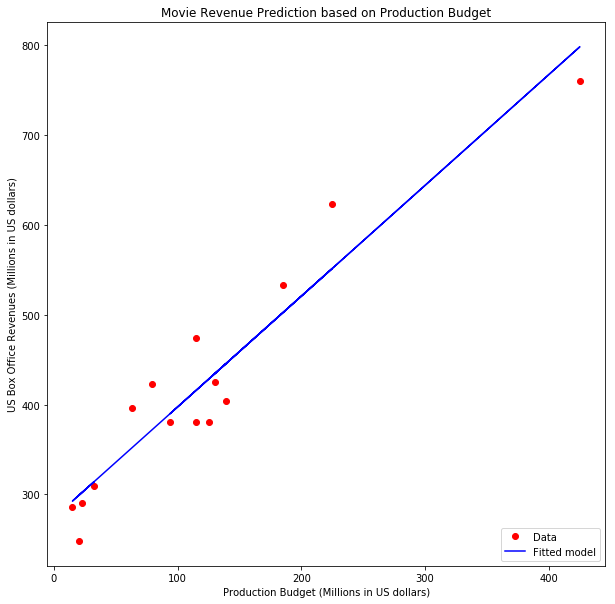

In [7]:
fig = plt.figure(figsize=(10, 10))
plt.plot(movie_data["prod_budget_millions"], movie_data["domestic_gross_millions"], 'ro')
plt.plot(movie_data["prod_budget_millions"], model_results.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'], loc=4)
plt.xlabel('Production Budget (Millions in US dollars)')
plt.ylabel('US Box Office Revenues (Millions in US dollars)')
plt.title('Movie Revenue Prediction based on Production Budget')
plt.show()

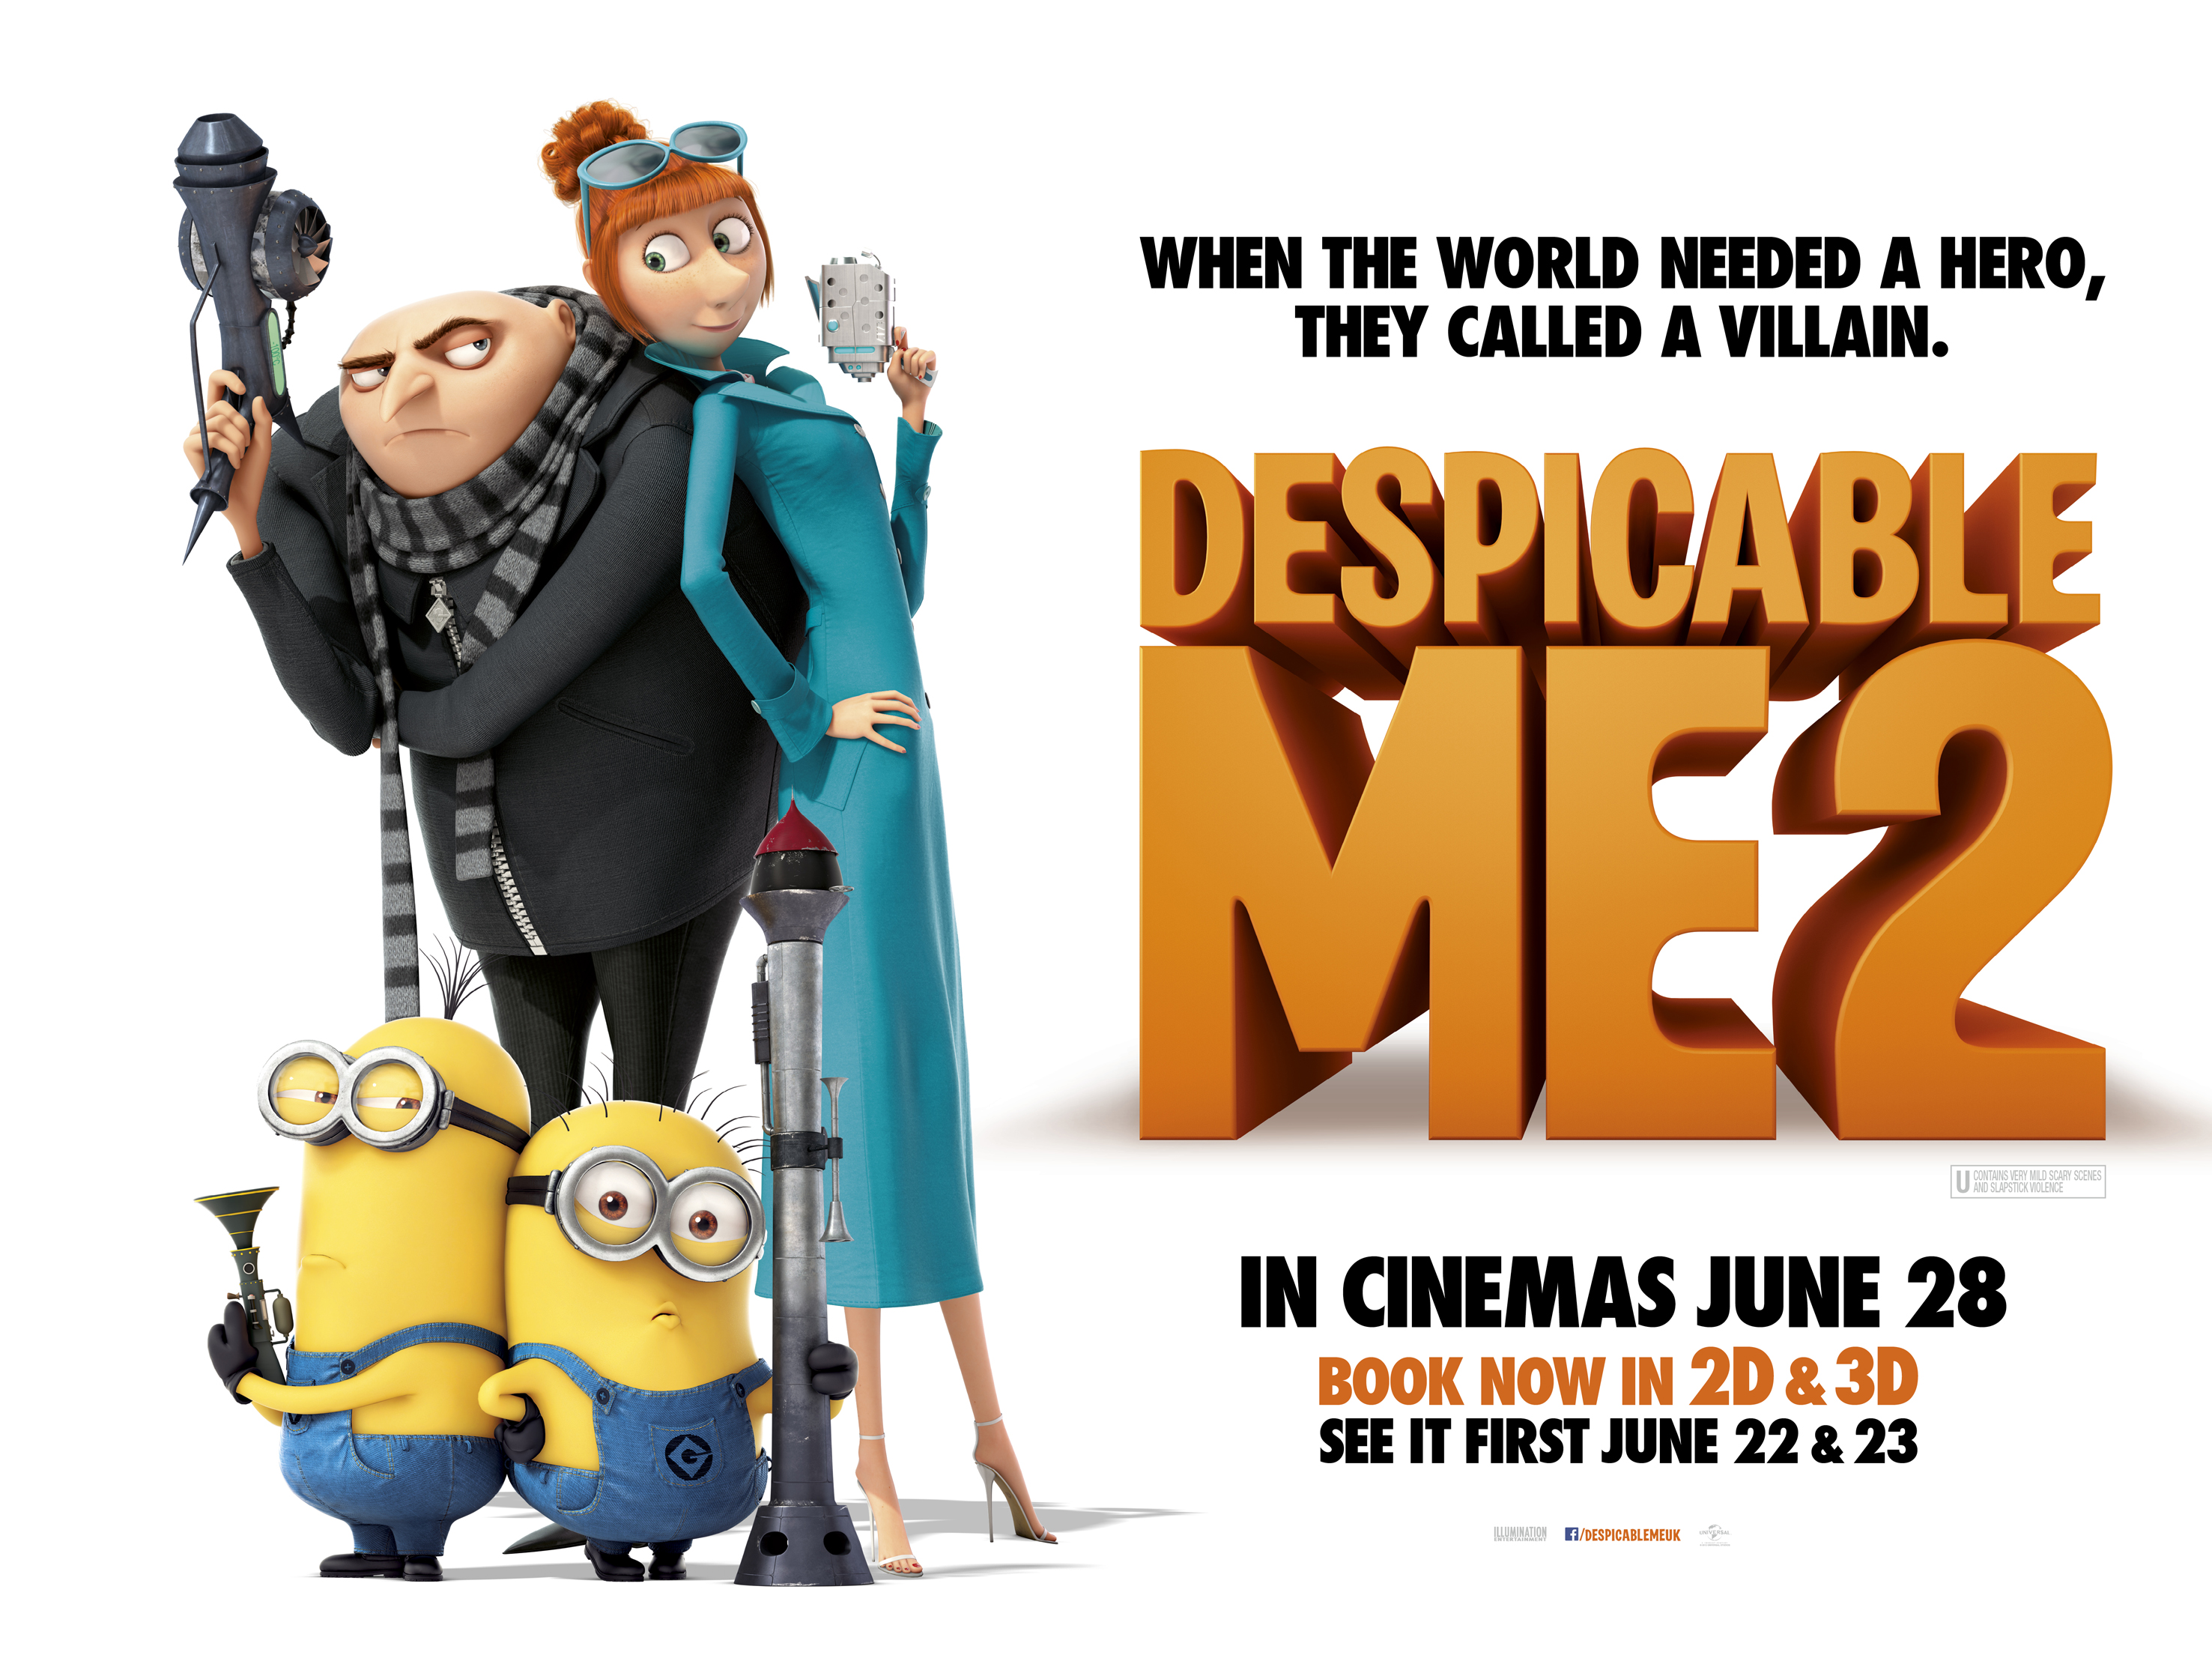

In [8]:
 Image(filename='./data/despicableme2.jpg')

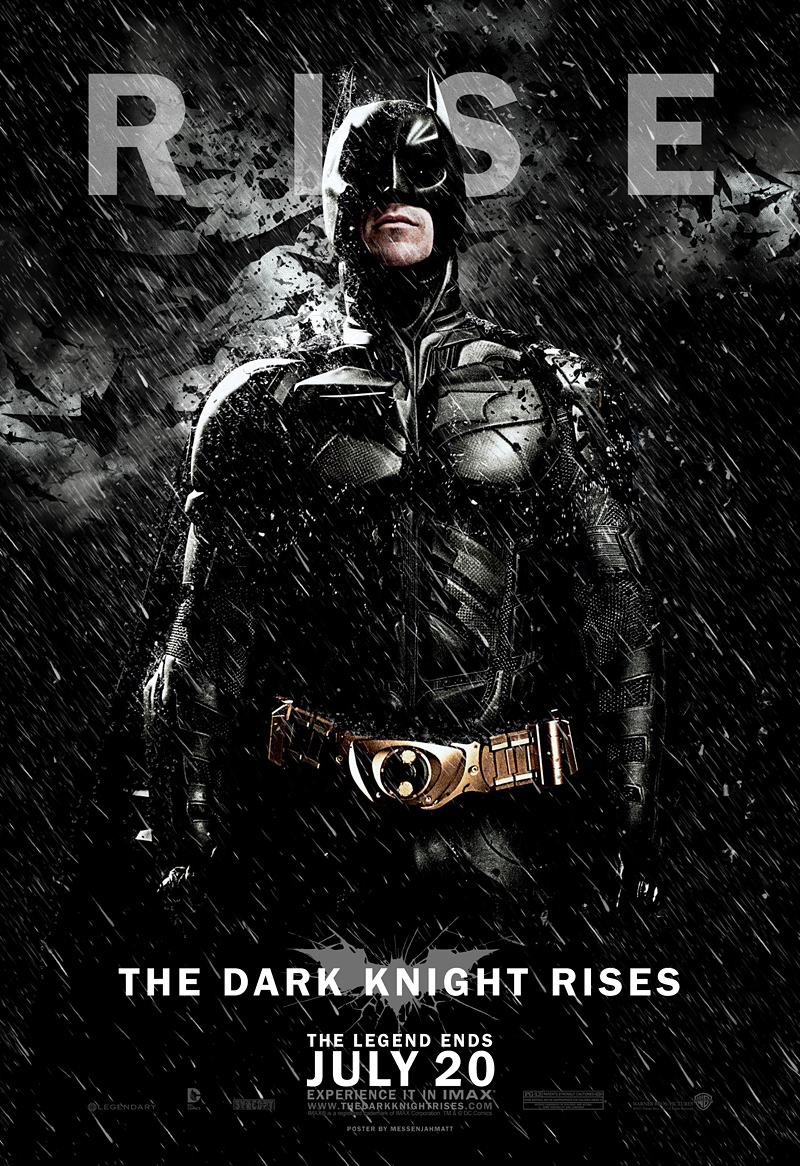

In [9]:
 Image(filename='./data/thedarkknightrises.jpg')

In [10]:
# let us predict the Despicable Me 2 and The Dark Knight Rises movies
x_prod_budgets = [ 76, 275 ] # 76 for DM2 and 275 for DKR (millions in prod costs)
x_new = { "prod_budget_millions" : x_prod_budgets }
y_pred = model_results.predict(x_new)
print(y_pred)

0    367.857843
1    613.104827
dtype: float64


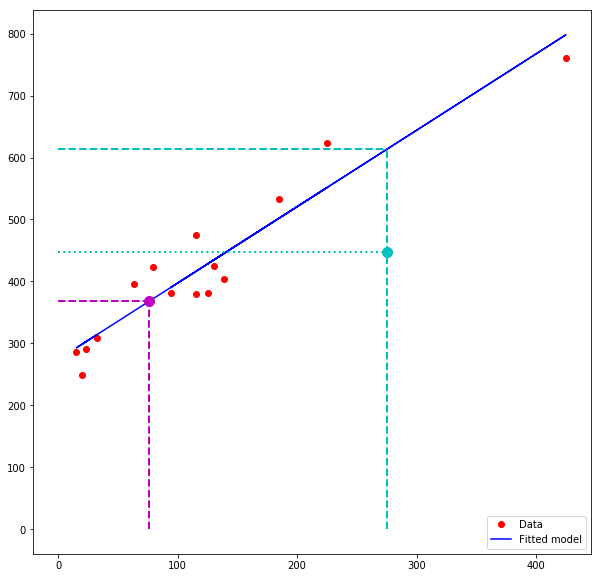

In [11]:
fig = plt.figure(figsize=(10, 10))
plt.plot(movie_data["prod_budget_millions"], movie_data["domestic_gross_millions"], 'ro')

plt.plot(movie_data["prod_budget_millions"], model_results.fittedvalues, 'b')
plt.plot([0, x_prod_budgets[0]], [y_pred[0], y_pred[0]], 'm--', lw=2)
plt.plot([0, x_prod_budgets[0]], [368, 368], 'm:', lw=2)
plt.plot([x_prod_budgets[0], x_prod_budgets[0]], [0, y_pred[0]], 'm--', lw=2)

plt.plot([0, x_prod_budgets[1]], [y_pred[1], y_pred[1]], 'c--', lw=2)
plt.plot([0, x_prod_budgets[1]], [448, 448], 'c:', lw=2)
plt.plot([x_prod_budgets[1], x_prod_budgets[1]], [0, y_pred[1]], 'c--', lw=2)

plt.plot(x_prod_budgets[0], 368, 'mo', markersize=10)
plt.plot(x_prod_budgets[1], 448, 'co', markersize=10) # why is this far off mark?

plt.legend(['Data', 'Fitted model'], loc=4)